IMPORT REQUIRED LIBRARIES

In [1]:
import shap
from sklearn.ensemble import RandomForestClassifier
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from pycaret.classification import *
import optuna
import Reqs
import numpy as np
from sklearn.metrics import accuracy_score
import databricks.sql
from sqlalchemy import create_engine
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import ML_Model_Preprocessing_Loading as MMPL
import Model_Creation_Tools as MCL
import Model_Explanation_Tools as MET
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

Fetch Training Data:

In [2]:
data = MMPL.DRP_Agena_Ingestion_Model_Fetch_Data(segment='train')

Apply Preprocessing Pipeline

In [28]:
testing = data

In [35]:
test = testing.groupby('Model_y')['AnyPaymentReceived'].agg(['mean', 'count'])

In [39]:
pd.set_option('display.max_rows',1000)

In [42]:
test[test['count']>2].sort_values('mean',ascending=False).head(500)

,mean,count
Model_y,,
XC60SELUXNAVD4AWDAU,1.000000,4
BRAVODYNAMICM-JET150,1.000000,3
125DMSPORTSHADOWEDITI,1.000000,3
PASSATHIGHLINE,1.000000,3
JAZZSENAVII-VTEC,1.000000,4
X2M35IAUTO,1.000000,4
Q5SLNED150TFSIEQU,1.000000,3
RAV4BUSINESSEDTSSD-4D,1.000000,3
XC40INSCRIPTIONT4RECHA,1.000000,3


In [4]:
data, features, target  = MMPL.DRP_Agena_Ingestion_Model_Preprocess(data)

Outward code generated...
Inward code generated...
Short Postcode generated...
Offence Date Dtype converted to DateTime...
Offense Time Hour Extracted...
Offense Time Hour converted to Int...
Creating Time Bins...
Create Time Bin Labels...
Applying Bins to Dataset...
Generating Day of Week...
Extracting Year...
Extracting Month...
Converting DOF to DateTime...
Generating Offense Count...
Generating Target Column...
De-Duping Registration, this may take a few minutes...
Generating BatchIDs
Finalising Data...
Finalising Features...
Finalising Target...


Setup ML Model Environment

In [5]:
    car_ranking_dim = pd.read_csv('Car_ranking_dim.csv')
    data = pd.merge(data, car_ranking_dim, left_on='Make_y', right_on='Car Brand', how='inner')

In [6]:
data

,Debt_id,BatchID,DESCRIPTION,Make_y,Model_y,Price Point,month,Registration,age_of_debt,Outward_Code,client_name,OffenceTime_binned,day_of_week,Offense_Count,AnyPaymentReceived,Car Brand,Category,Price Rating,Average Price Estimate,Rank
0,11124350.0,BT2022,NOPERMIT,FORD,FOCUS,standard,2.0,08RN2175,176.0,M50,UKCPM,Evening,Sunday,1,0,FORD,Mainstream,2,30000,34
1,11448209.0,BT052023,WHOLEPERIODOFPARKINGNOTPAIDFOR,FORD,RANGERWILDTRAKECOBLUE4,standard,5.0,101JCB,43.0,TQ25,PREMIER,Afternoon,Monday,1,1,FORD,Mainstream,2,30000,34
2,10422190.0,BT092022,NOPARKINGOUTSIDEOFADESIGNATEDAREA,FORD,GALAXYGHIA16VAUTO,standard,9.0,15VN,36.0,NW95,UKCPM,Afternoon,Monday,1,1,FORD,Mainstream,2,30000,34
3,8920197.0,BT2021,PARKINGINDISABLEDBAYWITHOUTCLEARLYDISPLAYINGAV...,FORD,MONDEOVIGNALETDCIAUTO,standard,8.0,214BYC,77.0,RM20,PREMIER,Afternoon,Wednesday,1,0,FORD,Mainstream,2,30000,34
4,10700351.0,BT112022,FAILURETOPAYFORTHEDURATIONOFSTAY,FORD,FIESTATITANIUMTURBOAUT,standard,11.0,25SL,55.0,DA11,PREMIER,Afternoon,Friday,2,0,FORD,Mainstream,2,30000,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132039,10550356.0,BT102022,UNAUTHORISEDPARKING,MCLAREN,570SSPIDERS-A,unknown,10.0,SF68OYN,45.0,E14,UKCPM,Early Morning,Friday,3,0,MCLAREN,Luxury,5,200000,9
132040,11093935.0,BT022022,PARKINGINDISABLEDBAYWITHOUTCLEARLYDISPLAYINGAV...,MCLAREN,570SSPIDERS-A,unknown,2.0,W17LSY,49.0,G51,PREMIER,Afternoon,Monday,2,0,MCLAREN,Luxury,5,200000,9
132041,10651794.0,BT112021,NOTDISPLAYINGAVALIDPERMIT,MCLAREN,570GTCOUPES-A,unknown,11.0,W3KHN,357.0,SE10,UKCPM,Afternoon,Thursday,5,0,MCLAREN,Luxury,5,200000,9
132042,10606407.0,BT102022,PARKINGINNOPARKINGAREA,MCLAREN,570SSPIDERS-A,unknown,10.0,YE54CAD,49.0,G51,PREMIER,Evening,Monday,2,0,MCLAREN,Luxury,5,200000,9


In [7]:
MLENV, model = MCL.Create_Model(data,'AnyPaymentReceived','lightgbm',['Debt_id','Registration','BatchID'])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 73287, number of negative: 73287
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7403
[LightGBM] [Info] Number of data points in the train set: 146574, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Description,Value
0,Session id,1793
1,Target,AnyPaymentReceived
2,Target type,Binary
3,Original data shape,"(132044, 20)"
4,Transformed data shape,"(186188, 10)"
5,Transformed train set shape,"(146574, 10)"
6,Transformed test set shape,"(39614, 10)"
7,Ignore features,3
8,Numeric features,6
9,Categorical features,10


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7364,0.6455,0.2591,0.3276,0.2894,0.1303,0.1317
1,0.7371,0.6514,0.2612,0.3298,0.2915,0.1328,0.1342
2,0.7442,0.6548,0.2362,0.3338,0.2766,0.1268,0.1296
3,0.7362,0.6568,0.2628,0.3288,0.2921,0.1325,0.1337
4,0.7489,0.6568,0.2419,0.3473,0.2852,0.1388,0.1421
5,0.7382,0.6534,0.2623,0.3325,0.2932,0.1353,0.1367
6,0.7479,0.6563,0.2273,0.3383,0.2719,0.1265,0.1301
7,0.7460,0.6439,0.2621,0.3493,0.2995,0.1482,0.1505
8,0.7496,0.6488,0.2371,0.3474,0.2818,0.1367,0.1404


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

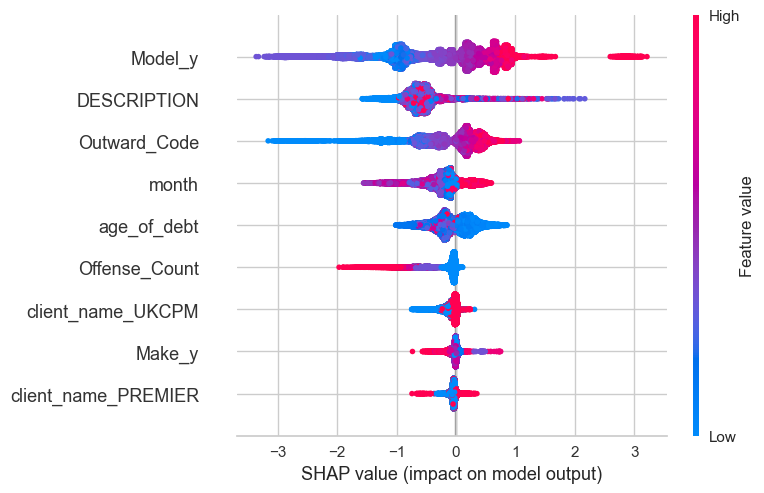

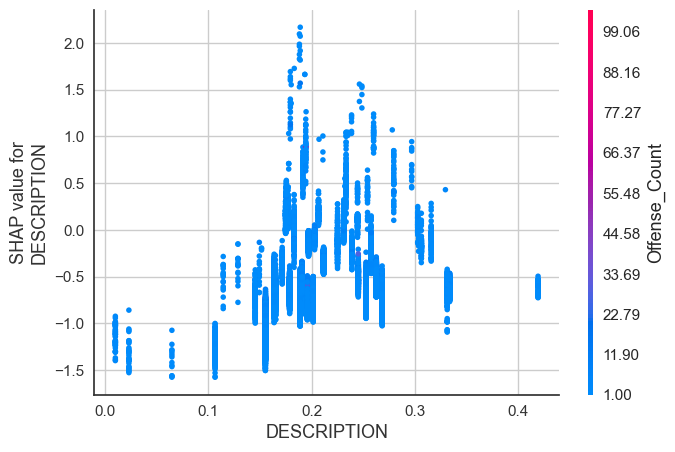

In [8]:
MET.Model_Generate_Shap_Diagrams(model)

In [9]:
model = tune_model(model, optimize='Precision')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7705,0.6553,0.1249,0.3489,0.1839,0.0839,0.0990
1,0.7492,0.6518,0.1750,0.3119,0.2242,0.0886,0.0938
2,0.7575,0.6550,0.1677,0.3313,0.2227,0.0970,0.1049
3,0.7578,0.6605,0.1886,0.3448,0.2438,0.1141,0.1215
4,0.7693,0.6608,0.1275,0.3456,0.1863,0.0840,0.0983
5,0.7516,0.6503,0.1980,0.3325,0.2482,0.1107,0.1161
6,0.7696,0.6578,0.1285,0.3475,0.1876,0.0854,0.0998
7,0.7557,0.6409,0.1859,0.3374,0.2397,0.1085,0.1154
8,0.7687,0.6498,0.1185,0.3353,0.1752,0.0750,0.0889


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [10]:
model = calibrate_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7493,0.6506,0.2189,0.3376,0.2656,0.1227,0.1269
1,0.7464,0.6578,0.2257,0.3338,0.2693,0.1228,0.1262
2,0.7446,0.6567,0.2273,0.3303,0.2693,0.1209,0.1240
3,0.7469,0.6593,0.2372,0.3406,0.2796,0.1321,0.1353
4,0.7501,0.6576,0.2362,0.3477,0.2813,0.1366,0.1404
5,0.7449,0.6546,0.2262,0.3305,0.2686,0.1206,0.1238
6,0.7501,0.6588,0.2184,0.3393,0.2657,0.1236,0.1280
7,0.7490,0.6438,0.2319,0.3434,0.2768,0.1318,0.1355
8,0.7528,0.6486,0.2084,0.3416,0.2588,0.1208,0.1261


In [11]:
model = finalize_model(model)

In [12]:
dataTest = MMPL.DRP_Agena_Ingestion_Model_Fetch_Data(segment='live')

In [13]:
dataTest, featuresTest, targetTest  = MMPL.DRP_Agena_Ingestion_Model_Preprocess(dataTest)

Outward code generated...
Inward code generated...
Short Postcode generated...
Offence Date Dtype converted to DateTime...
Offense Time Hour Extracted...
Offense Time Hour converted to Int...
Creating Time Bins...
Create Time Bin Labels...
Applying Bins to Dataset...
Generating Day of Week...
Extracting Year...
Extracting Month...
Converting DOF to DateTime...
Generating Offense Count...
Generating Target Column...
De-Duping Registration, this may take a few minutes...
Generating BatchIDs
Finalising Data...
Finalising Features...
Finalising Target...


MODEL INTERPRETATION DASHBOARD:

dashboard(
    best,
    run_kwargs={"host": "127.0.0.1"},
    display_format= 'external'
     )

MODEL CALIBRATION:

In [14]:
    car_ranking_dim = pd.read_csv('Car_ranking_dim.csv')
    dataTest = pd.merge(dataTest, car_ranking_dim, left_on='Make_y', right_on='Car Brand', how='inner')

In [15]:
# Assuming 'best' is your trained model and 'dataTest' is your test dataset
probability_threshold = 0.85  # Replace with the value from your slider
percentile_cutoff = 0.85    
#best = finalize_model(best) # Replace with your actual trained model variable
predictions = predict_model(model, data=dataTest,probability_threshold=probability_threshold)
predictions = predictions[predictions['prediction_label']==1]
#predictions = predictions[predictions['AnyPaymentReceived']==0]
# Apply the cutoff prediction probability
#predictions['Label'] = predictions['prediction_score'].apply(lambda x: 1 if x >= probability_threshold else 0)

# If you're using percentile as a cutoff, select top percentile of samples
predictions = predictions.sort_values('prediction_score', ascending=False)
cutoff_index = int(len(predictions) * percentile_cutoff)
subset_predictions = predictions.iloc[:cutoff_index]

# This subset_predictions is now your dataset outside the dashboard
# You can save this to a CSV file or use it as needed
subset_predictions.to_csv('your_filtered_predictions.csv', index=False)
pd.set_option('display.max_rows',1000)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7766,0.5738,0.0253,0.2794,0.0464,0.0111,0.0222


In [16]:
    results = subset_predictions
    predicted_ones = results[results['prediction_label'] == 1]
    TP = (predicted_ones['AnyPaymentReceived'] == 1).sum()
    FP = (predicted_ones['AnyPaymentReceived'] == 0).sum()
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    print(f'Precision: {precision:.2f}| Total Call Predictions (1): {len(predicted_ones)}| Correct Predictions: {TP}| Incorrect: {len(predicted_ones)-TP}')

Precision: 0.28| Total Call Predictions (1): 678| Correct Predictions: 191| Incorrect: 487


In [17]:
results[results['Offense_Count']<10].head(100)

,Debt_id,BatchID,DESCRIPTION,Make_y,Model_y,Price Point,month,Registration,age_of_debt,Outward_Code,client_name,OffenceTime_binned,day_of_week,Offense_Count,Car Brand,Category,Price Rating,Average Price Estimate,Rank,AnyPaymentReceived,prediction_label,prediction_score
28724,11673745.0,BT062023,VEHICLENOTREGISTERED(ANPR/CCTV),FORD,FIESTAST-2TURBO,standard,6.0,J77PSK,40.0,CO15,UKCPM,Late Morning,Sunday,1,FORD,Mainstream,2,30000,34,1,1,0.9847
26824,11986145.0,BT082023,INVALIDPERMIT,FORD,FIESTATITANIUMTURBO,standard,8.0,EJ67GPU,38.0,SG14,UKCPM,Evening,Tuesday,1,FORD,Mainstream,2,30000,34,0,1,0.9836
17810,11883276.0,BT082023,INVALIDPERMIT,AUDI,A1SLINE30TFSI,luxury,8.0,MM21SYP,37.0,GU22,UKCPM,Late Morning,Saturday,1,AUDI,Luxury,5,55000,17,0,1,0.9835
9354,12264645.0,BT102023,VEHICLENOTREGISTERED(ANPR/CCTV),BMW,320DSETOURINGAUTO,luxury,10.0,AV55FFZ,40.0,CO15,UKCPM,Evening,Sunday,1,BMW,Luxury,5,50000,20,0,1,0.9835
7770,11604266.0,BT062023,"""PARKEDINELECTRICBAY,NOTACTIVELYCHARGING""",VOLKSWAGEN,PASSATHIGHLINETDI140,standard,6.0,SD59VCW,47.0,TN23,UKCPM,Early Morning,Sunday,1,VOLKSWAGEN,Premium,4,30000,29,0,1,0.9835
16319,11592267.0,BT062023,VEHICLENOTREGISTERED(ANPR/CCTV),AUDI,A1SLINETFSI,luxury,6.0,GJ11NKU,47.0,CO15,UKCPM,Evening,Thursday,1,AUDI,Luxury,5,55000,17,0,1,0.9828
4144,12449805.0,BT112023,PERMITREQUIRED,VOLKSWAGEN,GOLFS102,standard,11.0,DY08FTV,39.0,SW90,UKCPM,Late Morning,Thursday,1,VOLKSWAGEN,Premium,4,30000,29,0,1,0.9822
26688,12264646.0,BT102023,VEHICLENOTREGISTERED(ANPR/CCTV),FORD,GALAXYGHIATDDI,standard,10.0,EG04ZNL,40.0,CO15,UKCPM,Evening,Sunday,1,FORD,Mainstream,2,30000,34,0,1,0.9819
32588,11604158.0,BT062023,"""PARKEDINELECTRICBAY,NOTACTIVELYCHARGING""",FORD,FIESTAEDGEAUTO,standard,6.0,YK12ZDD,51.0,TN23,UKCPM,Afternoon,Wednesday,1,FORD,Mainstream,2,30000,34,1,1,0.9815
2038,11644160.0,BT062023,PARKEDINPARENTANDCHILDBAY,NISSAN,PRIMASTAR,standard,6.0,OU55JHF,48.0,NG71,PREMIER,Afternoon,Tuesday,1,NISSAN,Mainstream,2,25000,36,0,1,0.9814


In [18]:
results[results.Make_y =='SEAT']

,Debt_id,BatchID,DESCRIPTION,Make_y,Model_y,Price Point,month,Registration,age_of_debt,Outward_Code,client_name,OffenceTime_binned,day_of_week,Offense_Count,Car Brand,Category,Price Rating,Average Price Estimate,Rank,AnyPaymentReceived,prediction_label,prediction_score


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(20, 10))  
sns.histplot(sept['Price Point']) 

plt.title('Distribution of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

NameError: name 'sept' is not defined

<Figure size 2000x1000 with 0 Axes>